# Define and display colours

In [1]:
#Define colours for plotting.
colours = c(
    HAstV4_diff='#b80101',
    HAstV4='#ff9301',
    HAstV4_undiff='#ffc101',
    MLB2_diff='#7b0fa6',
    MLB2='#592bf5',
    MLB2_undiff='#679ffa',
    VA1_diff='#1a5d3a',
    VA1='#1fbd6b',
    VA1_undiff='#82de25',
    Mock_diff='#4b4b49',
    Mock='#919190',
    Mock_undiff='#c5c5c0',
    diff='#aa05b2',
    undiff='#f68ed7')

pdf 
  2

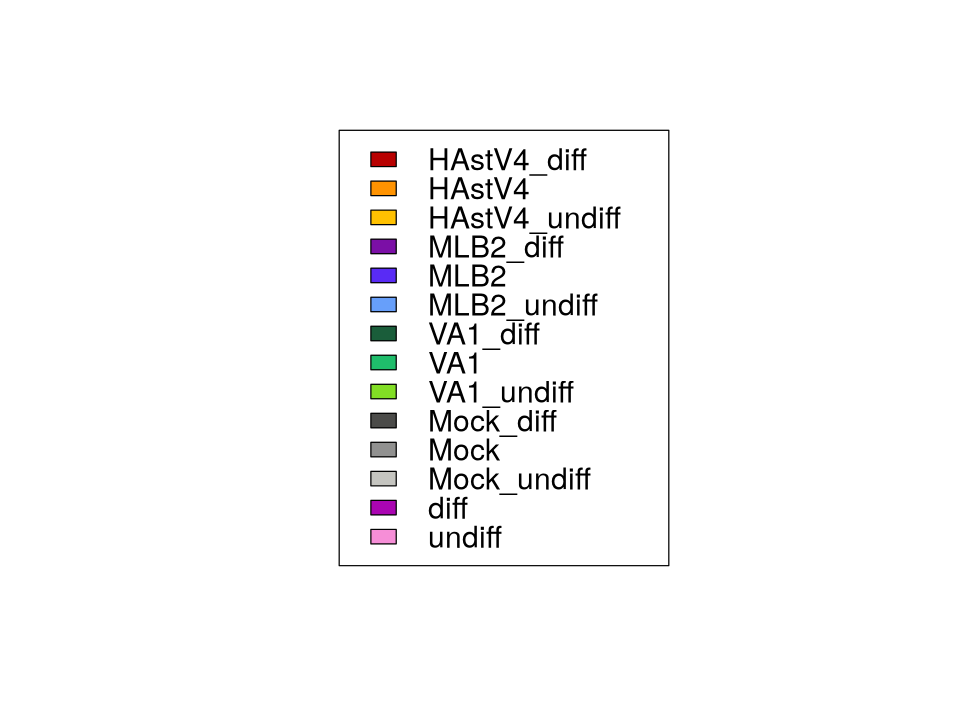

In [2]:
#Display the colours, this figure is saved as legend.pdf
options(repr.plot.width=8, repr.plot.height=6)

# Plot PDF version
pdf("legend.pdf", height=9)
plot(c(), xlim = c(0, 1), ylim = c(0, 1), axes = FALSE, ylab = "", xlab = "")
legend(x = 0.5, y = 0.5, fill = colours,
       legend = names(colours), xjust = 0.5, yjust = 0.5, cex = 2)
dev.off()

# Plot on screen
plot(c(), xlim = c(0, 1), ylim = c(0, 1), axes = FALSE, ylab = "", xlab = "")
legend(x = 0.5, y = 0.5, fill = colours,
       legend = names(colours), xjust = 0.5, yjust = 0.5, cex = 1.5)



# Prepare samples

In [3]:
samples = read.table('gut_samples.tsv')
#rownames(samples) = samples$V4
#colnames(samples) = c('virus','replicate','organoid_stage','id')
samples$name = paste(samples$virus, samples$replicate, samples$organoid_stage, samples$id, sep='_')
write.table(samples, 'gut_samples.tsv')
samples

,virus,replicate,organoid_stage,id,name
,<chr>,<int>,<chr>,<chr>,<chr>
S22,HAstV4,1,diff,S22,HAstV4_1_diff_S22
S10,HAstV4,1,undiff,S10,HAstV4_1_undiff_S10
S23,HAstV4,2,diff,S23,HAstV4_2_diff_S23
S11,HAstV4,2,undiff,S11,HAstV4_2_undiff_S11
S24,HAstV4,3,diff,S24,HAstV4_3_diff_S24
S12,HAstV4,3,undiff,S12,HAstV4_3_undiff_S12
S16,MLB2,1,diff,S16,MLB2_1_diff_S16
S4,MLB2,1,undiff,S4,MLB2_1_undiff_S4
S17,MLB2,2,diff,S17,MLB2_2_diff_S17


In [92]:
samples$condition = paste0(samples$virus,'_',samples$organoid_stage)

# Load genes

In [12]:
genes = read.table('../../ref/h38_e110_new/genes_new.gtf',sep='\t')
genes = genes[genes$V3 == 'gene',]
genes[1:3,]

,V1,V2,V3,V4,V5,V6,V7,V8,V9
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,1,havana,gene,182696,184174,.,+,.,gene_id ENSG00000279928; gene_version 2; gene_name DDX11L17; gene_source havana; gene_biotype unprocessed_pseudogene;
8,1,havana,gene,2581560,2584533,.,+,.,gene_id ENSG00000228037; gene_version 1; gene_source havana; gene_biotype lncRNA;
13,1,ensembl_havana,gene,3069168,3438621,.,+,.,gene_id ENSG00000142611; gene_version 17; gene_name PRDM16; gene_source ensembl_havana; gene_biotype protein_coding;


In [13]:
attr_names = c('gene_id','gene_name','gene_biotype')
attrs = strsplit(genes$V9,'; ')
attrs = lapply(attrs,function(x){
    x = strsplit(x,' ')
    x = setNames(sub(';$','',sapply(x,'[',2)),
             sapply(x,'[',1))
    x[attr_names]
})
attrs = as.data.frame(do.call(rbind,attrs))
colnames(attrs) = attr_names
attrs[1:10,]

,gene_id,gene_name,gene_biotype
,<chr>,<chr>,<chr>
1,ENSG00000279928,DDX11L17,unprocessed_pseudogene
2,ENSG00000228037,NA,lncRNA
3,ENSG00000142611,PRDM16,protein_coding
4,ENSG00000284616,NA,lncRNA
5,ENSG00000157911,PEX10,protein_coding
6,ENSG00000269896,NA,transcribed_processed_pseudogene
7,ENSG00000228463,NA,transcribed_processed_pseudogene
8,ENSG00000260972,NA,lncRNA
9,ENSG00000224340,RPL21P21,processed_pseudogene


In [14]:
attrs$gene_biotype[is.na(attrs$gene_biotype)] = 'viral'

In [15]:
attrs[1:10,]

,gene_id,gene_name,gene_biotype
,<chr>,<chr>,<chr>
1,ENSG00000279928,DDX11L17,unprocessed_pseudogene
2,ENSG00000228037,NA,lncRNA
3,ENSG00000142611,PRDM16,protein_coding
4,ENSG00000284616,NA,lncRNA
5,ENSG00000157911,PEX10,protein_coding
6,ENSG00000269896,NA,transcribed_processed_pseudogene
7,ENSG00000228463,NA,transcribed_processed_pseudogene
8,ENSG00000260972,NA,lncRNA
9,ENSG00000224340,RPL21P21,processed_pseudogene


In [16]:
genes = genes[,c(1,4,5,7)]
colnames(genes) = c('chr','start','end','strand')
genes = cbind(genes,attrs)
rownames(genes) = genes$gene_id
genes[1:2,]

,chr,start,end,strand,gene_id,gene_name,gene_biotype
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
ENSG00000279928,1,182696,184174,+,ENSG00000279928,DDX11L17,unprocessed_pseudogene
ENSG00000228037,1,2581560,2584533,+,ENSG00000228037,NA,lncRNA


In [17]:
table(genes$gene_biotype)


                          artifact                          IG_C_gene 
                                19                                 14 
                   IG_C_pseudogene                          IG_D_gene 
                                 9                                 37 
                         IG_J_gene                    IG_J_pseudogene 
                                18                                  3 
                     IG_pseudogene                          IG_V_gene 
                                 1                                145 
                   IG_V_pseudogene                             lncRNA 
                               187                              18866 
                             miRNA                           misc_RNA 
                              1879                               2221 
                           Mt_rRNA                            Mt_tRNA 
                                 2                                 22 
     

In [18]:
write.csv(genes,'../../output/gut/gut_genes.csv')

# load counts

In [19]:
file.exists('../../output/gut/counts/21.tsv')

[1] TRUE

In [20]:
counts = lapply(samples$id, function(s){
    read.table(paste0('../../output/gut/counts/',sub('S','',s), '.tsv'), row.names = 1)
})

In [21]:
sapply(counts,function(x)all(rownames(x) == rownames(counts[[1]])))

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [22]:
counts = do.call(cbind,counts) # cbind(counts[[1]],counts[[2]],...)
colnames(counts) = samples$id
#rownames(counts)[rownames(counts)=='VA1_genome'] = 'VA1'
counts = as.matrix(counts)
counts[1:4,]

,S22,S10,S23,S11,S24,S12,S16,S4,S17,S5,⋯,S14,S2,S15,S3,S19,S7,S20,S8,S21,S9
ENSG00000000003,319,345,313,402,187,566,560,587,411,489,⋯,195,449,402,501,86,402,303,237,283,217
ENSG00000000005,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,4,0,0,0,0,0
ENSG00000000419,200,281,150,520,158,555,327,462,416,324,⋯,42,375,336,317,182,264,142,217,76,256
ENSG00000000457,90,110,98,183,75,148,199,58,183,112,⋯,34,191,41,192,31,108,59,70,52,94


In [23]:
mapping_qc = counts[!(rownames(counts) %in% genes$gene_id),]
counts = counts[genes$gene_id,]

In [24]:
mapping_qc = rbind(mapping_qc,t(sapply(split.data.frame(counts,genes$gene_biotype),colSums)))
mapping_qc

,S22,S10,S23,S11,S24,S12,S16,S4,S17,S5,⋯,S14,S2,S15,S3,S19,S7,S20,S8,S21,S9
__no_feature,3847516,3409174,4717938,4448708,4233288,3768623,4908727,3977735,5531832,3574734,⋯,1734133,3670327,4666343,4143251,3276880,3651263,3111898,3460436,4681625,3985518
__ambiguous,117170,127437,126435,183073,127773,201985,167878,182856,157265,156598,⋯,54087,152342,150627,192628,86758,143147,122531,122368,98820,158000
__too_low_aQual,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
__not_aligned,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
__alignment_not_unique,54070647,32529830,64827669,48250104,56719833,45798493,76018085,44951559,56578786,45408517,⋯,27743829,30041136,49891536,56518108,31262200,47256857,44436185,47995061,38085166,44467721
artifact,19,121,65,153,50,114,156,95,139,73,⋯,40,98,46,152,35,125,35,72,65,119
IG_C_gene,0,0,1,0,0,0,33,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
IG_C_pseudogene,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
IG_D_gene,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
IG_J_gene,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [26]:
stat = round(sweep(mapping_qc,2,colSums(mapping_qc),'/')*100,digits = 1)
stat[order(rowSums(stat),decreasing = T),]

,S22,S10,S23,S11,S24,S12,S16,S4,S17,S5,⋯,S14,S2,S15,S3,S19,S7,S20,S8,S21,S9
__alignment_not_unique,80.5,64.8,81.9,73.7,78.2,73.0,84.0,75.4,78.5,77.7,⋯,85.4,70.2,78.9,78.7,66.5,72.5,75.0,73.3,70.3,73.1
protein_coding,7.5,11.6,6.8,12.4,7.8,13.5,8.3,14.3,10.8,12.9,⋯,7.2,17.0,10.9,12.5,8.4,10.0,8.4,8.7,8.1,12.0
__no_feature,5.7,6.8,6.0,6.8,5.8,6.0,5.4,6.7,7.7,6.1,⋯,5.3,8.6,7.4,5.8,7.0,5.6,5.2,5.3,8.6,6.6
viral,4.4,13.9,3.4,4.1,6.1,4.4,0.1,0.1,0.1,0.2,⋯,0.0,0.0,0.0,0.0,16.0,9.2,9.0,10.3,10.5,5.4
Mt_rRNA,1.3,2.1,1.4,2.1,1.4,2.2,1.4,2.4,2.1,2.2,⋯,1.5,3.0,2.0,2.2,1.5,1.8,1.6,1.8,1.6,2.0
lncRNA,0.3,0.5,0.3,0.5,0.4,0.5,0.4,0.6,0.5,0.5,⋯,0.4,0.7,0.5,0.6,0.4,0.5,0.4,0.4,0.5,0.5
__ambiguous,0.2,0.3,0.2,0.3,0.2,0.3,0.2,0.3,0.2,0.3,⋯,0.2,0.4,0.2,0.3,0.2,0.2,0.2,0.2,0.2,0.3
Mt_tRNA,0.1,0.1,0.1,0.1,0.0,0.1,0.0,0.1,0.0,0.0,⋯,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.1,0.0
__too_low_aQual,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
__not_aligned,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
write.csv(mapping_qc,'../../output/gut/mapping_qc.csv')
write.csv(counts,'../../output/gut/counts_all_genes.csv')

# Viral expression

In [28]:
counts = as.matrix(read.csv('../../output/gut/counts_all_genes.csv',row.names = 1))
samples = read.table('gut_samples.tsv')
genes = read.csv('../../output/gut/gut_genes.csv',row.names = 1)

In [29]:
colnames(counts)

[1] "S22" "S10" "S23" "S11" "S24" "S12" "S16" "S4"  "S17" "S5"  "S18" "S6" 
[13] "S13" "S1"  "S14" "S2"  "S15" "S3"  "S19" "S7"  "S20" "S8"  "S21" "S9"

In [30]:
vcounts = counts[genes$gene_biotype =='viral' ,]
colnames(vcounts) = samples$name
t(vcounts[,order(colnames(vcounts))])

,HAstV4,MLB2,VA1
HAstV4_1_diff_S22,2768615,41,193554
HAstV4_1_undiff_S10,1501,33,6971312
HAstV4_2_diff_S23,2634421,48,77137
HAstV4_2_undiff_S11,2684480,61,4822
HAstV4_3_diff_S24,4398814,19,35328
HAstV4_3_undiff_S12,2731423,28,5718
MLB2_1_diff_S16,1702,54686,3481
MLB2_1_undiff_S4,1415,74246,2941
MLB2_2_diff_S17,1607,40795,4864
MLB2_2_undiff_S5,6170,91663,4520


In [43]:
vcpm

,HAstV4_1_diff_S22,HAstV4_1_undiff_S10,HAstV4_2_diff_S23,HAstV4_2_undiff_S11,HAstV4_3_diff_S24,HAstV4_3_undiff_S12,MLB2_1_diff_S16,MLB2_1_undiff_S4,MLB2_2_diff_S17,MLB2_2_undiff_S5,⋯,Mock_2_diff_S14,Mock_2_undiff_S2,Mock_3_diff_S15,Mock_3_undiff_S3,VA1_1_diff_S19,VA1_1_undiff_S7,VA1_2_diff_S20,VA1_2_undiff_S8,VA1_3_diff_S21,VA1_3_undiff_S9
HAstV4,3.023368e+05,1.060637e+02,2.772398e+05,2.126431e+05,3.849858e+05,2.106737e+05,181.9375,135.1913,164.0073,663.3844,⋯,130.214000,137.86589,162.042898,159.488981,1.191078e+02,1.157382e+02,1.207878e+02,1.218464e+02,346.1200,2.592582e+05
MLB2,4.477259e+00,2.331847e+00,5.051398e+00,4.831934e+00,1.662887e+00,2.159631e+00,5845.7315,7093.5761,4163.4574,9855.3973,⋯,2.361394,8.60963,2.460521,5.273866,2.256439e+00,2.971273e+00,2.584618e+00,2.088385e+00,3.6359,9.827765e+00
VA1,2.113638e+04,4.926071e+05,8.117702e+03,3.819604e+02,3.091919e+03,4.410274e+02,372.1060,280.9876,496.4103,485.9801,⋯,508.037004,426.90346,395.792415,331.980769,6.048558e+05,4.263250e+05,4.613620e+05,4.832052e+05,505799.4826,1.110161e+04


In [58]:
#write.csv(vcpm, "02_viral_vcpm_results_gut.csv", row.names = TRUE)

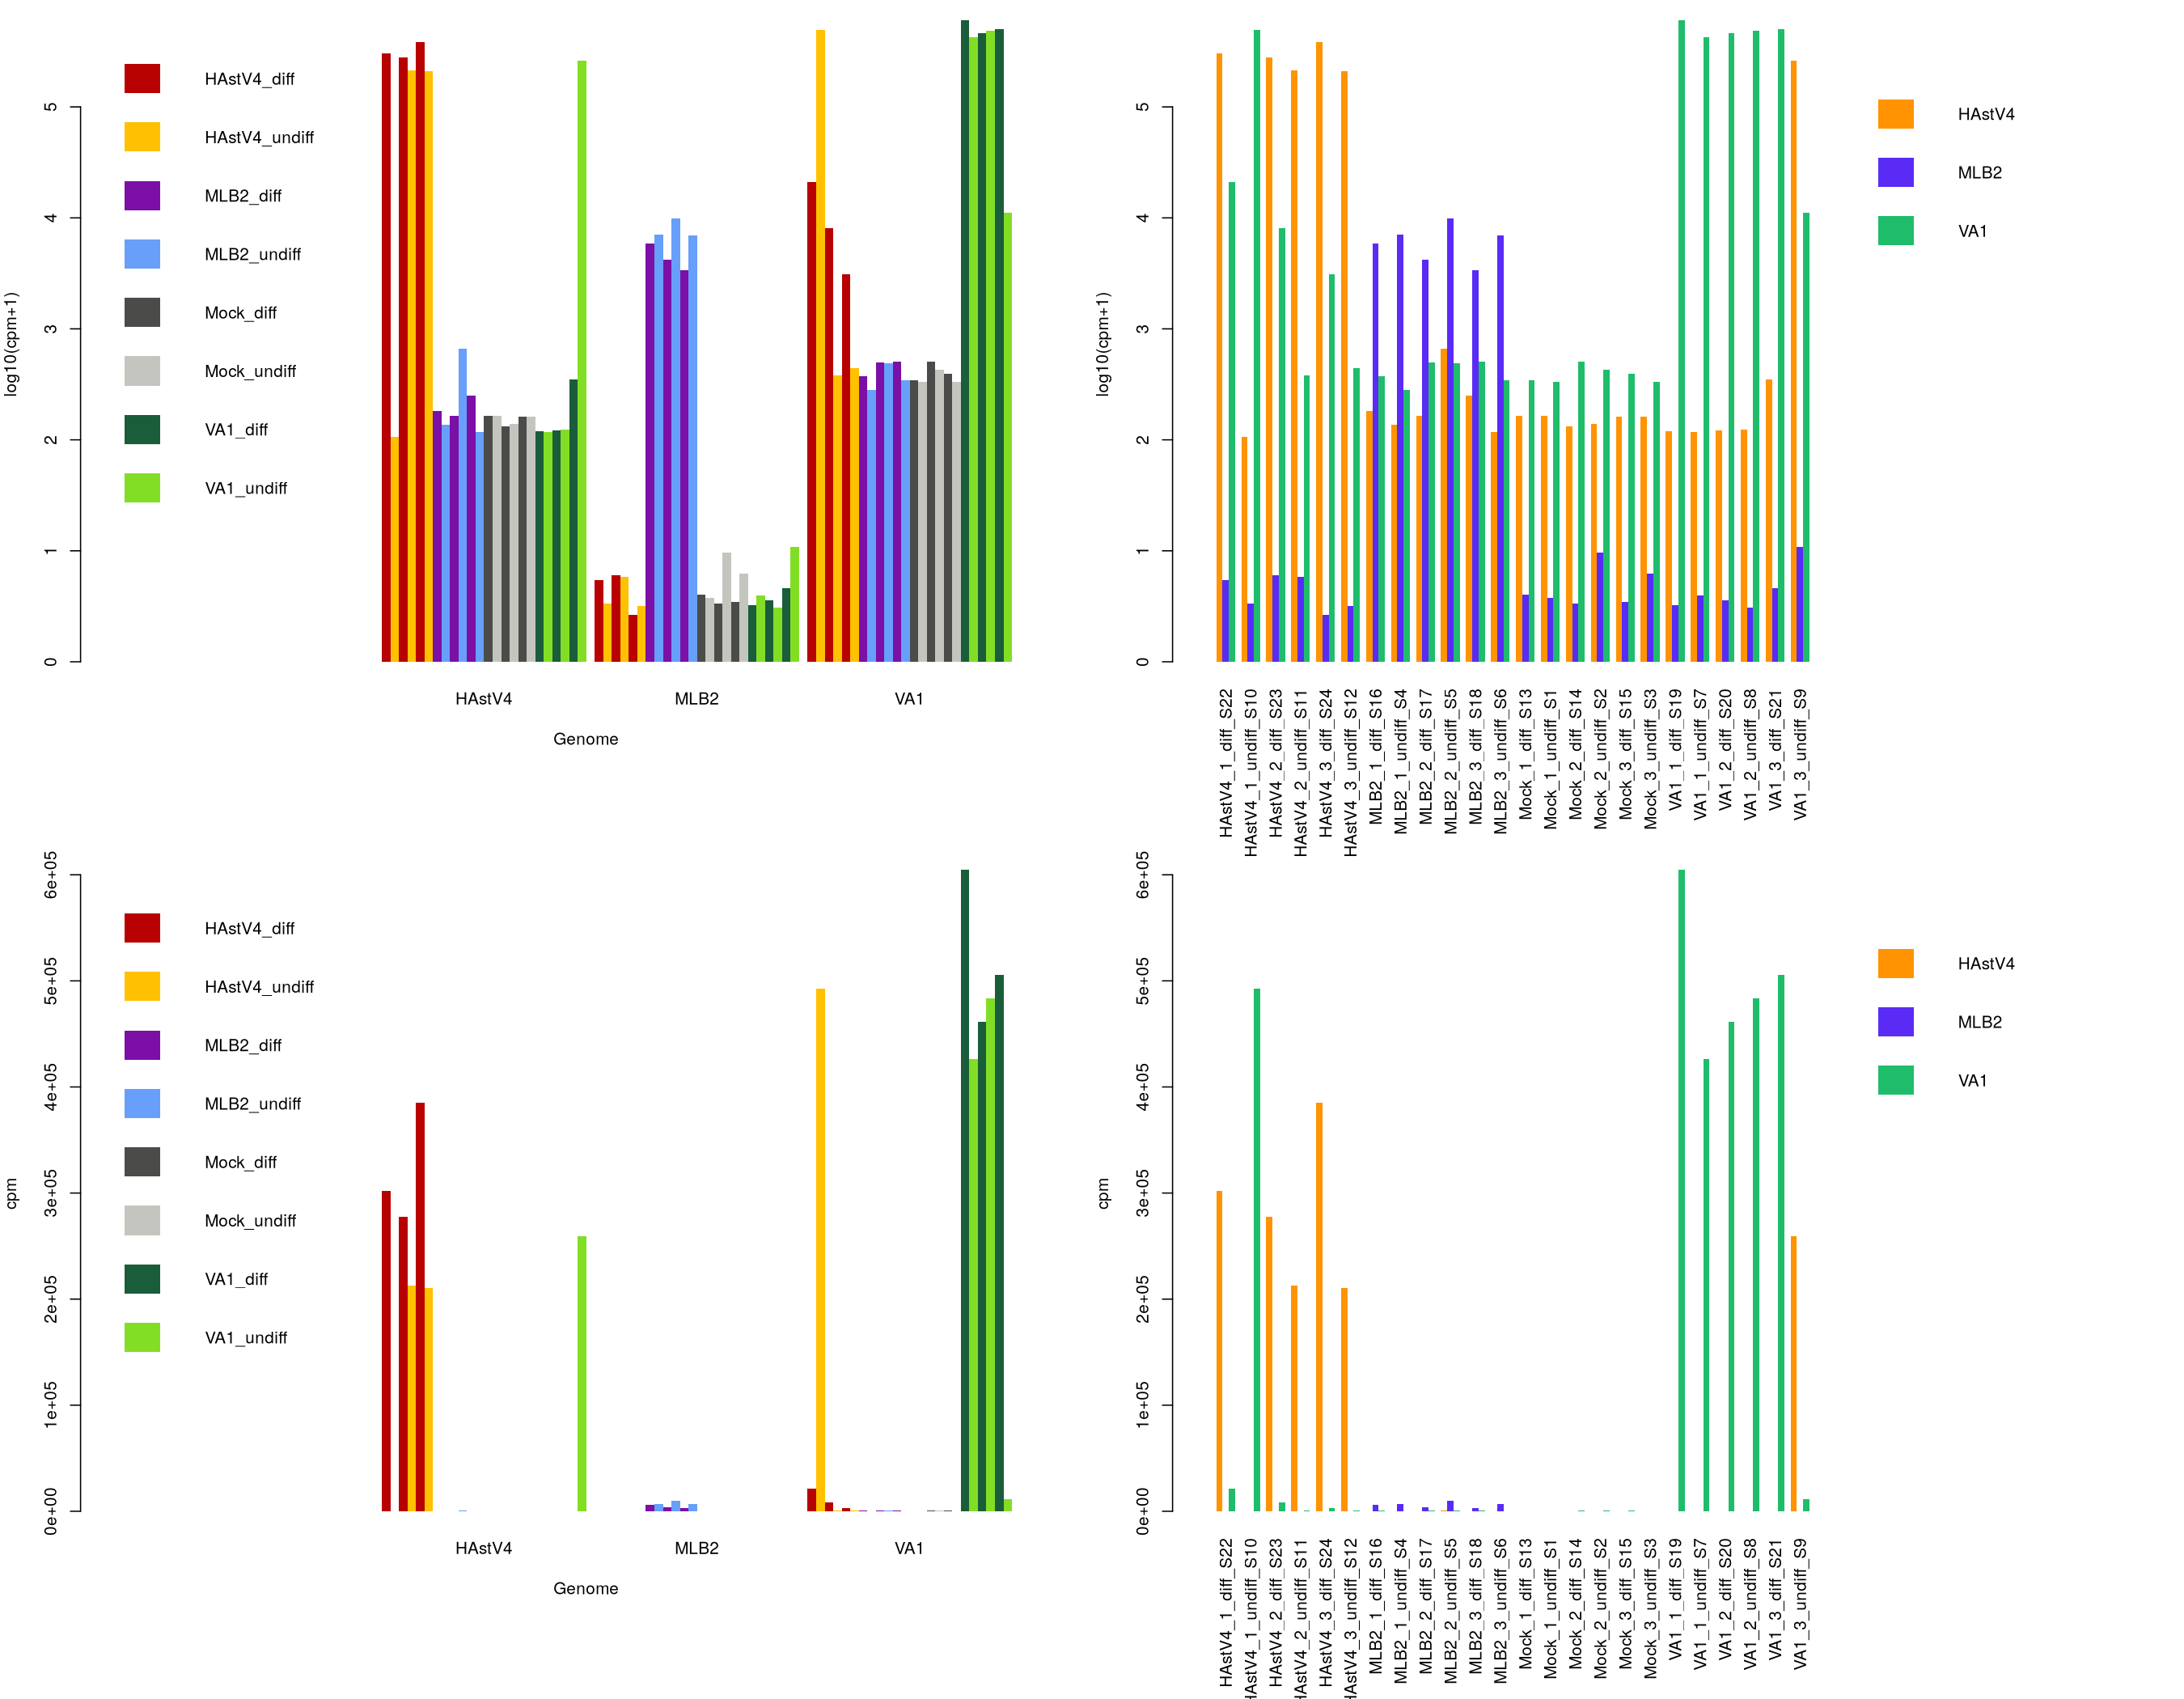

In [51]:
vcpm = sweep(vcounts,2,colSums(counts),'/')*1e6
cols=colours[paste0(samples$virus,'_',samples$organoid_stage)]
cnd = sort(unique(names(cols)))
#pdf('../../figures/gut/01_viral_expression_gut.pdf',w=8,h=8.5)
par(mfrow=c(2,2),mar=c(9,4,1,0))
options(repr.plot.width = 18, repr.plot.height = 14, repr.plot.res = 150) # defaults = 7,7,120
barplot(log10(1+t(vcpm)),beside = TRUE,border=NA,xlab='Genome',ylab='log10(cpm+1)',col=cols,xlim=c(-30,80))
legend('topleft',fill=colours[cnd],legend=cnd,bty='n',border=NA)
barplot(log10(1+vcpm),beside = TRUE,border=NA,ylab='log10(cpm+1)',las=3,legend.text = TRUE,
        args.legend = list(bty='n',border=NA),col=colours[rownames(vcpm)],xlim=c(0,150))

barplot(t(vcpm),beside = TRUE,border=NA,xlab='Genome',ylab='cpm',col=cols,xlim=c(-30,80))
legend('topleft',fill=colours[cnd],legend=cnd,bty='n',border=NA)
barplot(vcpm,beside = TRUE,border=NA,ylab='cpm',las=3,legend.text = TRUE,args.legend = list(bty='n',border=NA),col=colours[rownames(vcpm)],xlim=c(0,150))
#dev.off()

# Human protein coding expression

In [69]:
counts = as.matrix(read.csv('../../output/gut/counts_all_genes.csv',row.names = 1))
samples = read.table('gut_samples.tsv')
genes = read.csv('../../output/gut/gut_genes.csv',row.names = 1)
samples

,virus,replicate,organoid_stage,id,name
,<chr>,<int>,<chr>,<chr>,<chr>
S22,HAstV4,1,diff,S22,HAstV4_1_diff_S22
S10,HAstV4,1,undiff,S10,HAstV4_1_undiff_S10
S23,HAstV4,2,diff,S23,HAstV4_2_diff_S23
S11,HAstV4,2,undiff,S11,HAstV4_2_undiff_S11
S24,HAstV4,3,diff,S24,HAstV4_3_diff_S24
S12,HAstV4,3,undiff,S12,HAstV4_3_undiff_S12
S16,MLB2,1,diff,S16,MLB2_1_diff_S16
S4,MLB2,1,undiff,S4,MLB2_1_undiff_S4
S17,MLB2,2,diff,S17,MLB2_2_diff_S17


In [70]:
pcounts = counts[genes$gene_biotype == 'protein_coding', ]
dim(pcounts)

[1] 20070    24

In [71]:
nrow(pcounts) == length(unique(rownames(pcounts)))

[1] TRUE

In [53]:
#write.csv(counts,'../../output/gut/counts_protein_coding.csv')

In [73]:
library(DESeq2, quietly = TRUE, verbose = FALSE)


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums

In [78]:
rownames(samples) = colnames(pcounts) = samples$name
deseq = DESeqDataSetFromMatrix(countData = pcounts,
                              colData = samples,
                              design= ~ virus + organoid_stage)
deseq

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


class: DESeqDataSet 
dim: 20070 24 
metadata(1): version
assays(1): counts
rownames(20070): ENSG00000142611 ENSG00000157911 ... ENSG00000268674
  ENSG00000277475
rowData names(0):
colnames(24): HAstV4_1_diff_S22 HAstV4_1_undiff_S10 ... VA1_3_diff_S21
  VA1_3_undiff_S9
colData names(5): virus replicate organoid_stage id name


FALSE  TRUE 
 5164 14906 

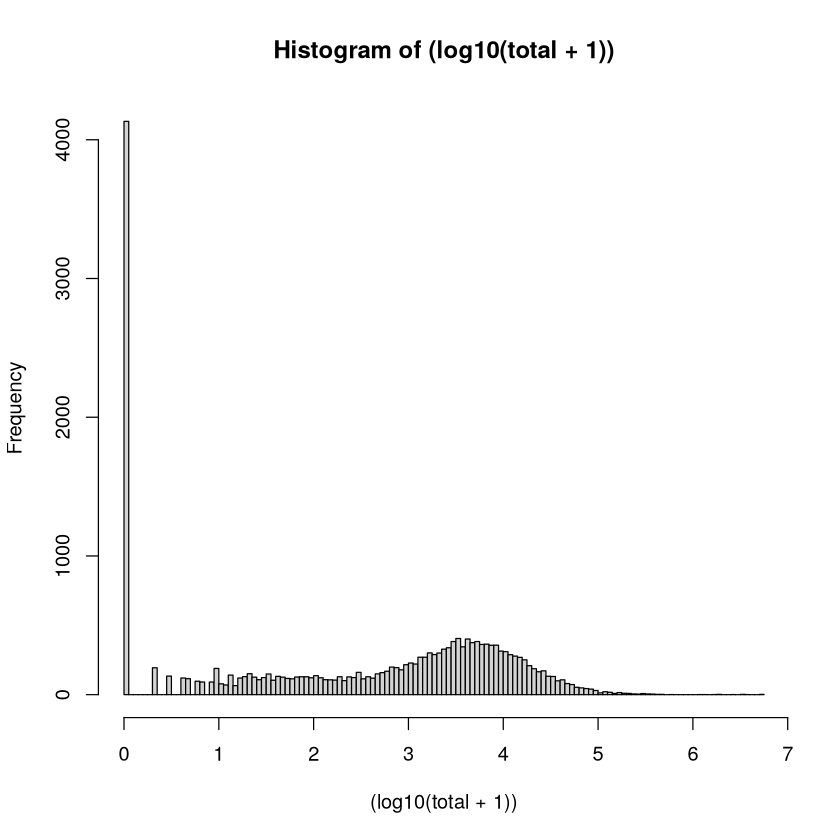

In [79]:
# filtes genes by total read counts
options(repr.plot.width = 7, repr.plot.height = 7, repr.plot.res = 120)
total = rowSums(counts(deseq))
hist((log10(total + 1)),100)
table(total>=10)

In [80]:
counts(deseq)[1:4,]>=10

,HAstV4_1_diff_S22,HAstV4_1_undiff_S10,HAstV4_2_diff_S23,HAstV4_2_undiff_S11,HAstV4_3_diff_S24,HAstV4_3_undiff_S12,MLB2_1_diff_S16,MLB2_1_undiff_S4,MLB2_2_diff_S17,MLB2_2_undiff_S5,⋯,Mock_2_diff_S14,Mock_2_undiff_S2,Mock_3_diff_S15,Mock_3_undiff_S3,VA1_1_diff_S19,VA1_1_undiff_S7,VA1_2_diff_S20,VA1_2_undiff_S8,VA1_3_diff_S21,VA1_3_undiff_S9
ENSG00000142611,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,⋯,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
ENSG00000157911,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,⋯,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
ENSG00000142655,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,⋯,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
ENSG00000149527,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,⋯,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE


In [81]:
# filtes genes 
nsamples10 = rowSums(counts(deseq)>=10)
table(nsamples10)

nsamples10
   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
5492  996  532  335  271  219  188  136  141  131  124  116  118  145  130  136 
  16   17   18   19   20   21   22   23   24 
 173  176  182  258  287  362  485  937 8000 

In [82]:
# remove genes with less than 10 reads in total
#deseq = deseq[total>=10,]
deseq = deseq[nsamples10>=2,]
deseq

class: DESeqDataSet 
dim: 13582 24 
metadata(1): version
assays(1): counts
rownames(13582): ENSG00000142611 ENSG00000157911 ... ENSG00000278384
  ENSG00000271254
rowData names(0):
colnames(24): HAstV4_1_diff_S22 HAstV4_1_undiff_S10 ... VA1_3_diff_S21
  VA1_3_undiff_S9
colData names(5): virus replicate organoid_stage id name

In [83]:
vsd = vst(deseq, blind=TRUE)
vsd

class: DESeqTransform 
dim: 13582 24 
metadata(1): version
assays(1): ''
rownames(13582): ENSG00000142611 ENSG00000157911 ... ENSG00000278384
  ENSG00000271254
rowData names(4): baseMean baseVar allZero dispFit
colnames(24): HAstV4_1_diff_S22 HAstV4_1_undiff_S10 ... VA1_3_diff_S21
  VA1_3_undiff_S9
colData names(6): virus replicate ... name sizeFactor

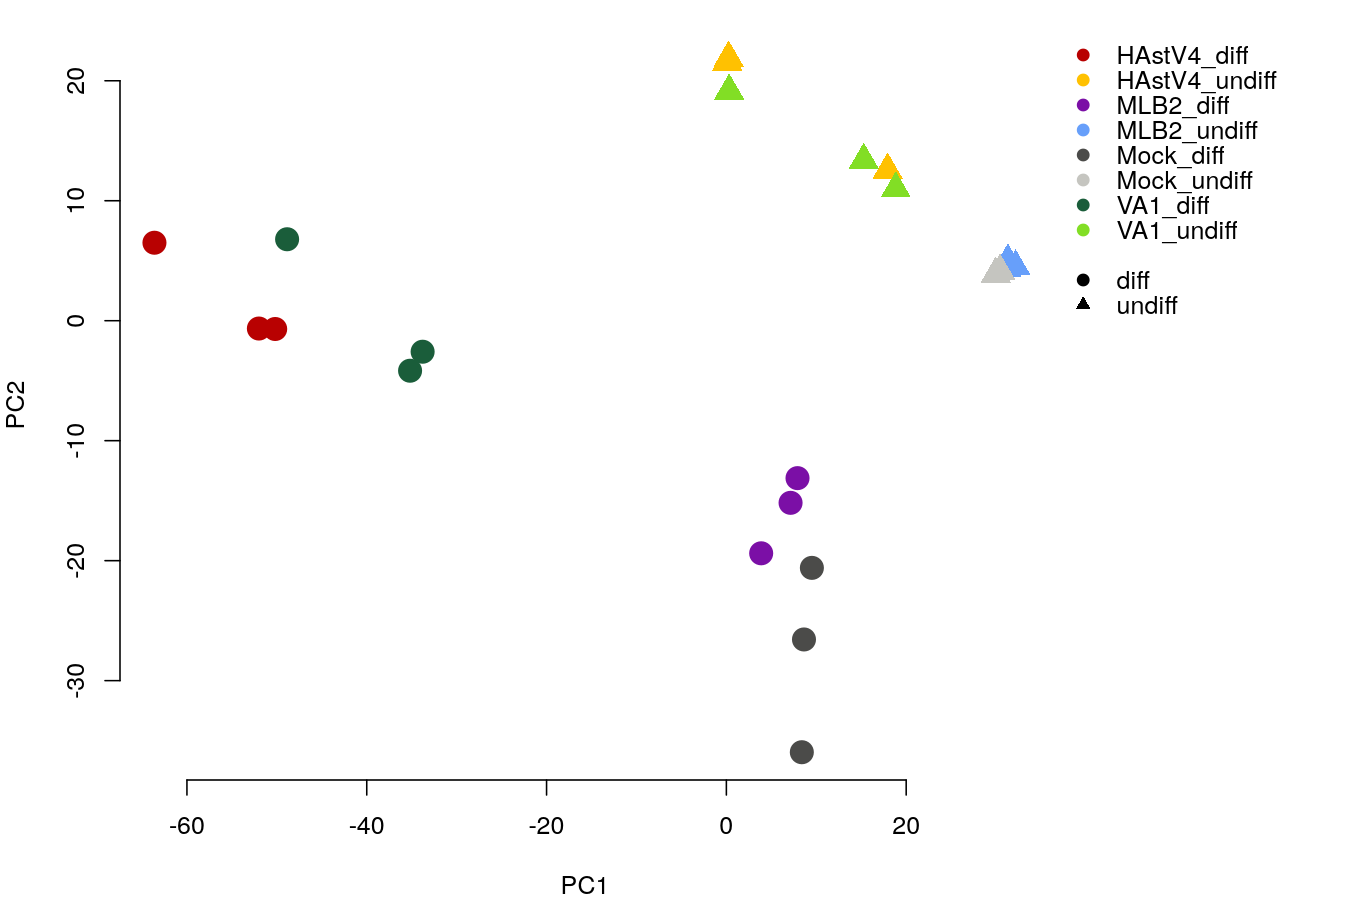

In [138]:
#pdf('../../figures/gut/03_human_plotPCA_condition_gut.pdf',w=8,h=8.5)
org_stage_pch = c(diff=19, undiff=17)
options(repr.plot.width = 9, repr.plot.height = 6, repr.plot.res = 150) 
pca = prcomp(t(assay(vsd)), center=TRUE, scale=FALSE)
par(bty='n',mar=c(4,4,1,10))
plot(pca$x[,1:2],col=colours[samples$condition], pch=org_stage_pch[samples$organoid_stage], cex=2)
cnd = sort(unique(samples$condition))
l=legend(grconvertX(1,'npc','user'),grconvertY(1,'npc','user'),pch=19,legend = cnd,col=colours[cnd],xpd=NA,bty='n')
legend(grconvertX(1,'npc','user'),l$rect$top-l$rect$h,pch=org_stage_pch,legend = names(org_stage_pch),xpd=NA,bty='n')
#dev.off()


In [128]:
#choose weird samples that we think to be messed up
#f = samples$virus %in% c('HAstV4', 'VA1') & samples$organoid_stage == 'undiff'
f = samples$organoid_stage == 'undiff'
f

[1] FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE
[13] FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE

[1] 1.841818e+01 9.903236e+00 9.358978e+00 8.812060e+00 8.628659e+00
 [6] 8.045349e+00 7.696834e+00 7.644582e+00 7.439409e+00 7.043229e+00
[11] 7.009488e+00 4.949782e-14

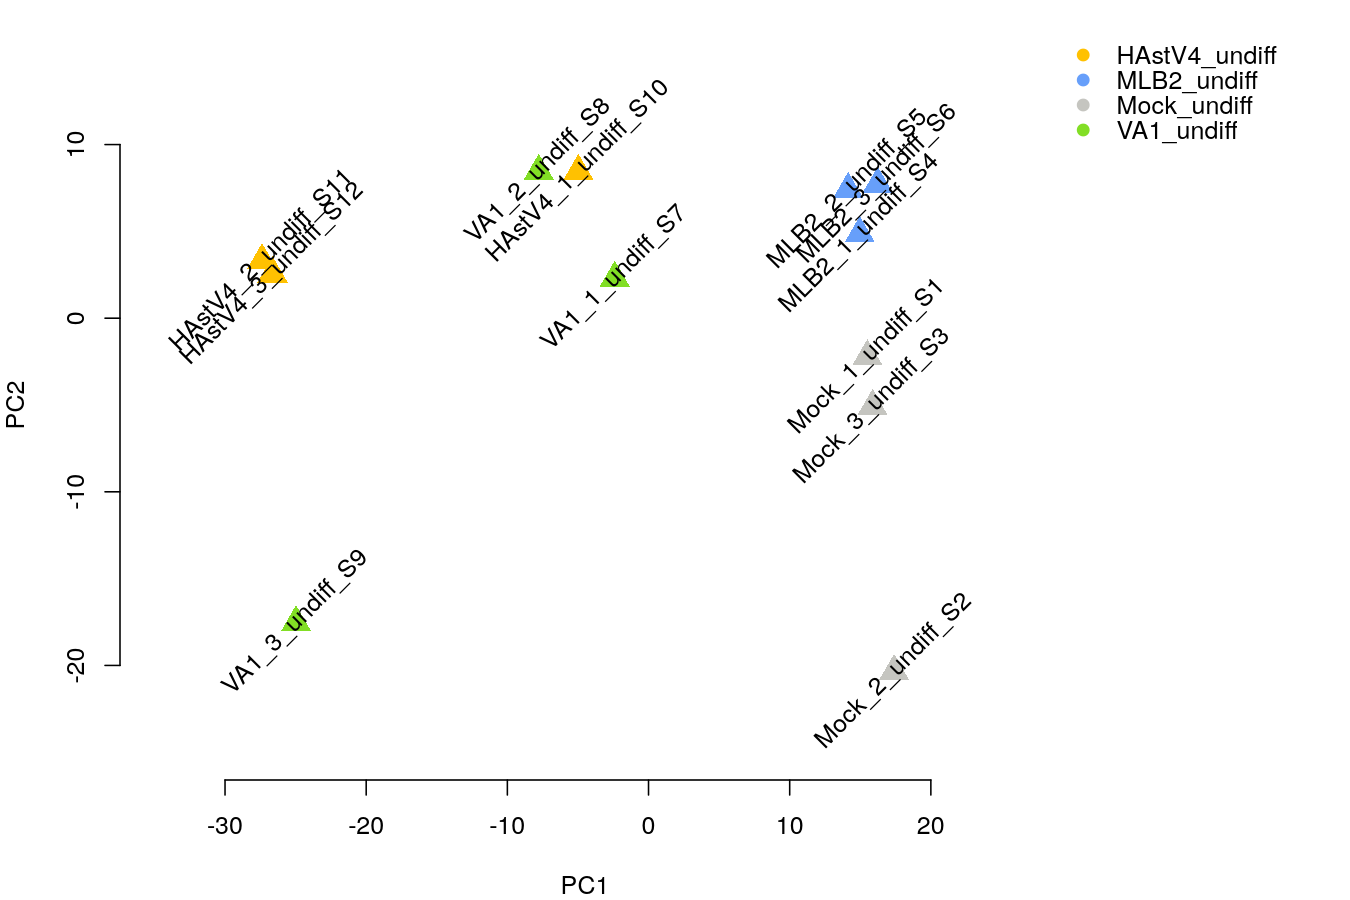

In [145]:
org_stage_pch = c(diff=19, undiff=17)
pca = prcomp(t(assay(vsd[,f])), center=TRUE, scale=FALSE)
options(repr.plot.width = 9, repr.plot.height = 6, repr.plot.res = 150) 
#pdf('../../figures/gut/04_human_plotPCA_VA1_HAstV4_gut.pdf',w=9,h=6)
par(bty='n',mar=c(4,4,1,10))
plot(pca$x[,1:2],col=colours[samples$condition[f]], pch=org_stage_pch[samples$organoid_stage[f]], cex=2,xlim=c(-35,26),ylim=c(-25,15))
text(pca$x[,1:2],samples$name[f],srt=45)
cnd = sort(unique(samples$condition[f]))
l=legend(grconvertX(1,'npc','user'),grconvertY(1,'npc','user'),pch=19,legend = cnd,col=colours[cnd],xpd=NA,bty='n')
pca$sdev/sum(pca$sdev)*100
#dev.off()

In [147]:
f = samples$virus %in% c('HAstV4', 'VA1') & samples$organoid_stage == 'undiff'
round(cor(assay(vsd[,f]),m='sp'),digits = 3)

,HAstV4_1_undiff_S10,HAstV4_2_undiff_S11,HAstV4_3_undiff_S12,VA1_1_undiff_S7,VA1_2_undiff_S8,VA1_3_undiff_S9
HAstV4_1_undiff_S10,1.000,0.957,0.958,0.969,0.972,0.958
HAstV4_2_undiff_S11,0.957,1.000,0.960,0.954,0.959,0.957
HAstV4_3_undiff_S12,0.958,0.960,1.000,0.957,0.960,0.959
VA1_1_undiff_S7,0.969,0.954,0.957,1.000,0.971,0.958
VA1_2_undiff_S8,0.972,0.959,0.960,0.971,1.000,0.961
VA1_3_undiff_S9,0.958,0.957,0.959,0.958,0.961,1.000


using ntop=500 top features by variance



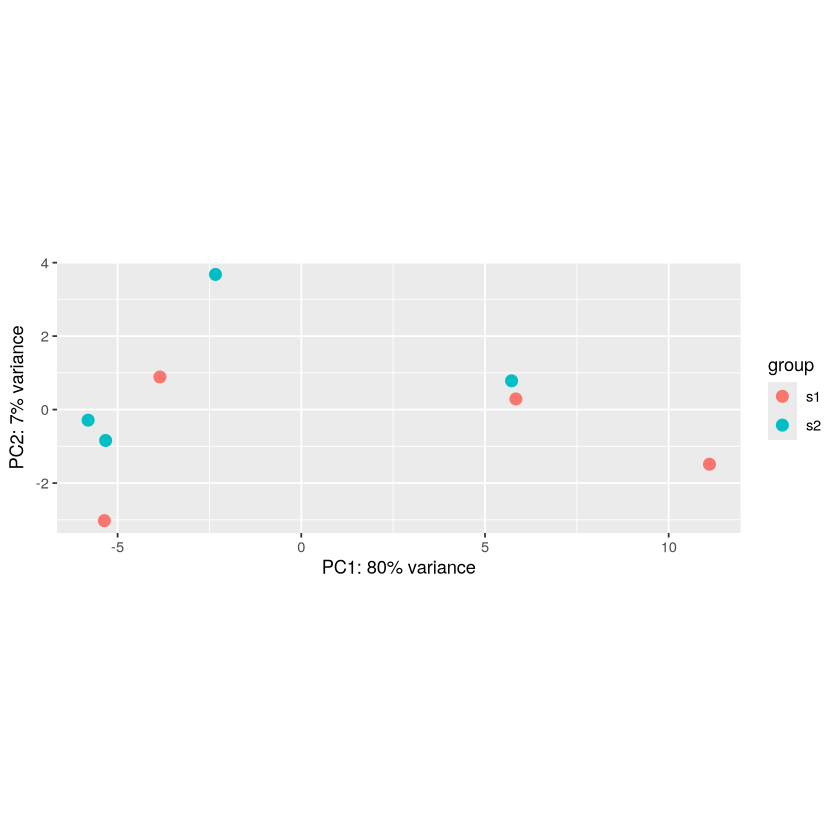

In [149]:
plotPCA(vsd, intgroup=c("replicate"))

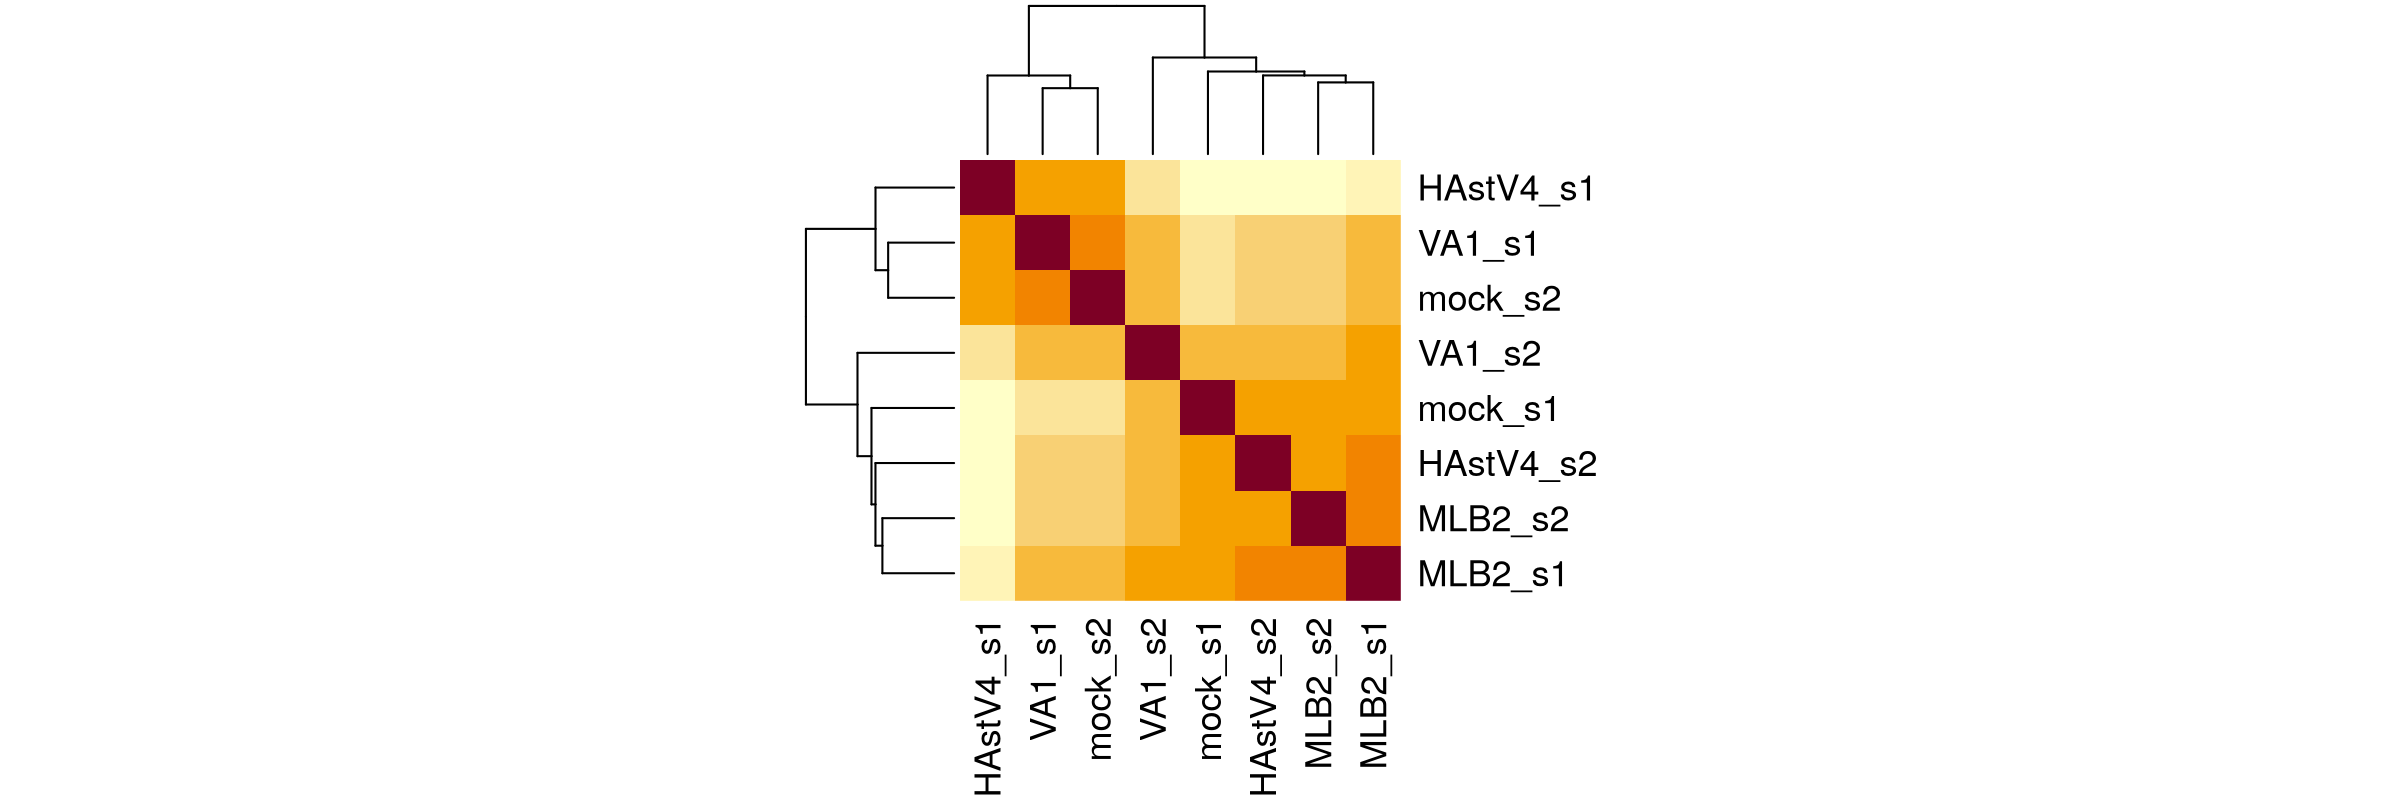

In [175]:
#pdf('../figures/02_human_heatmap.pdf',w=8,h=8.5)
cor = cor(counts(deseq),method = 'sp')
#cor = cor(vsd@assays@data[[1]],method = 'p')
heatmap(cor,distfun = function(x)as.dist(1-x),symm = TRUE,margins = c(6,6))
#dev.off()

## all viruses together

In [151]:
deseq = DESeq(deseq)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [152]:
cnds = c('MLB2','VA1','HAstV4')
res = lapply(cnds,function(c)results(deseq,contrast = c('condition','mock',c)))
names(res) = cnds

In [156]:
sapply(res,function(x){
    c(sign=sum(x$padj<0.2 & abs(x$log2FoldChange)>0))
})

MLB2.sign    VA1.sign HAstV4.sign 
          1           1           8

In [157]:
lapply(res,function(x){
    f = x$padj<0.2
    f[is.na(f)] = FALSE
    x = as.data.frame(x[f,c(1,2,6)])
    x$gene_name = genes[rownames(x),'gene_name']
    x[order(x$log2FoldChange),]
})

,baseMean,log2FoldChange,padj,gene_name
,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000120549,56.63075,-4.307891,0.05841395,KIAA1217
,baseMean,log2FoldChange,padj,gene_name
,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000117707,71.74059,-2.735477,0.151899,PROX1
,baseMean,log2FoldChange,padj,gene_name
,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000134996,22.01861,-8.2759903,0.014391531,OSTF1
ENSG00000120549,56.63075,-3.7729169,0.112426714,KIAA1217
ENSG00000117707,71.74059,-2.9096761,0.014391531,PROX1


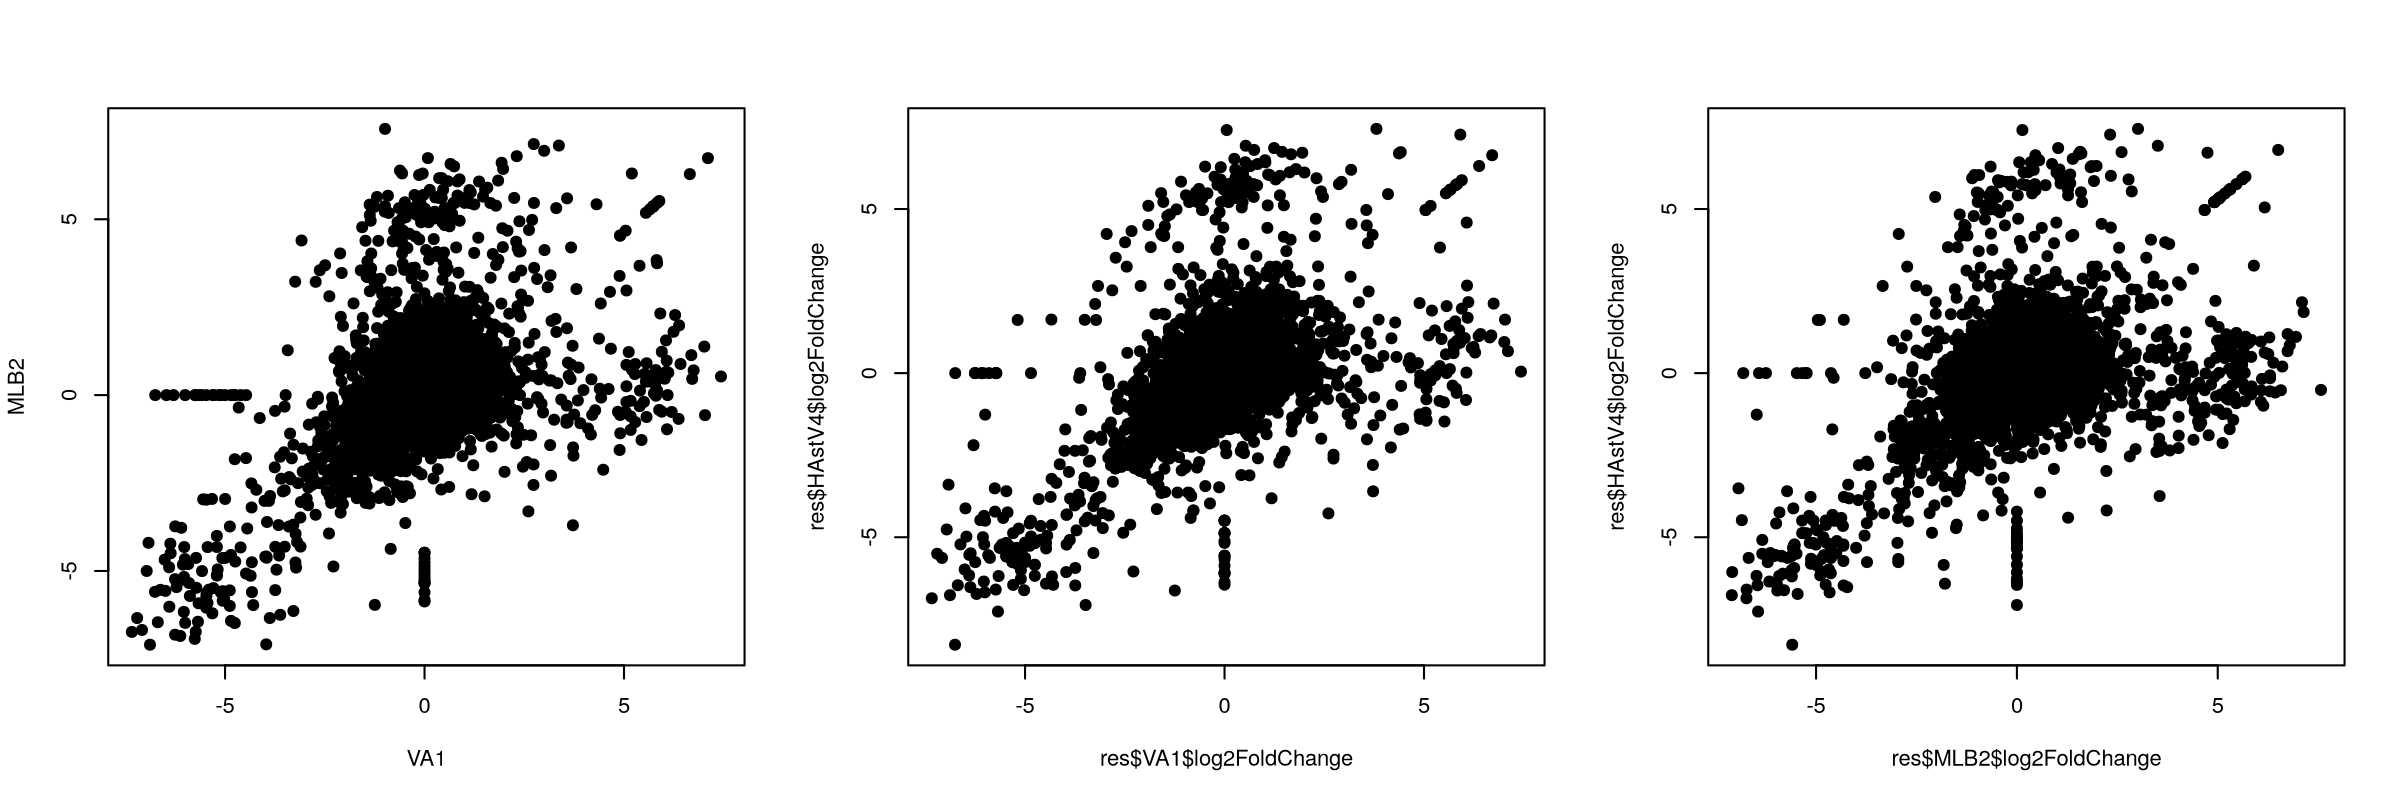

In [162]:
options(repr.plot.width = 12, repr.plot.height = 4, repr.plot.res = 200)
par(mfrow=c(1,3))
plot(res$VA1$log2FoldChange,res$MLB2$log2FoldChange,pch=19,xlab='VA1',ylab='MLB2')
plot(res$VA1$log2FoldChange,res$HAstV4$log2FoldChange,pch=19)
plot(res$MLB2$log2FoldChange,res$HAstV4$log2FoldChange,pch=19)

In [167]:
f = res$MLB2$log2FoldChange>5 & res$VA1$log2FoldChange>5
sel = res$VA1[f,]
cbind(sel,genes[rownames(sel),'gene_name'])

DataFrame with 10 rows and 7 columns
                 baseMean log2FoldChange     lfcSE      stat     pvalue
                <numeric>      <numeric> <numeric> <numeric>  <numeric>
ENSG00000203740   3.33807        5.73612   3.55411   1.61394 0.10654091
ENSG00000173626   5.99661        6.64991   2.96425   2.24337 0.02487311
ENSG00000237541   3.18316        5.54891   4.07310   1.36233 0.17309345
ENSG00000182070   3.91979        5.64794   3.50415   1.61179 0.10700810
ENSG00000196932   3.60204        5.74123   3.53883   1.62235 0.10472828
ENSG00000183346   8.59305        5.19681   2.63420   1.97283 0.04851549
ENSG00000205693   3.48515        5.82920   3.94394   1.47801 0.13940438
ENSG00000256950   3.67160        5.88561   3.49244   1.68524 0.09194202
ENSG00000184206   4.92729        5.71745   2.80227   2.04029 0.04132134
ENSG00000124253   9.10534        7.10391   2.61028   2.72152 0.00649833
                     padj genes[rownames(sel), "gene_name"]
                <numeric>              

## One virus by one

In [168]:
cnds = c('MLB2','VA1','HAstV4')
res2 = lapply(cnds,function(c){
    f = samples$condition %in% c('mock',c)
    x = DESeqDataSetFromMatrix(countData = counts[rownames(deseq),f],
                              colData = samples[f,],
                               design = ~ condition)
    x = DESeq(x)
    results(x,contrast = c('condition','mock',c))
    })
names(res2) = cnds

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [169]:
sapply(res2,function(x){
    c(sign=sum(x$padj<0.05 & abs(x$log2FoldChange)>0,na.rm=T))
})

MLB2.sign    VA1.sign HAstV4.sign 
          8           0           2

In [170]:
lapply(res2,function(x){
    f = x$padj<0.05 & abs(x$log2FoldChange)>0
    f[is.na(f)] = FALSE
    x = as.data.frame(x[f,c(1,2,6)])
    x$gene_name = genes[rownames(x),'gene_name']
    x[order(x$log2FoldChange),]
})

$MLB2
                  baseMean log2FoldChange         padj gene_name
ENSG00000120549   50.11637     -4.3102477 1.160747e-02  KIAA1217
ENSG00000113916  329.06114     -1.7771026 1.160747e-02      BCL6
ENSG00000175745 2845.22291     -1.3115234 2.433423e-10     NR2F1
ENSG00000185551  784.95780     -1.2095558 1.483149e-02     NR2F2
ENSG00000155760  743.09792     -1.1658143 1.851594e-02      FZD7
ENSG00000076356  866.29096     -0.9564076 1.483149e-02    PLXNA2
ENSG00000150471 1322.63791     -0.8491480 1.851594e-02    ADGRL3
ENSG00000174963   54.97500      4.5654600 3.421440e-02      ZIC4

$VA1
[1] baseMean       log2FoldChange padj           gene_name     
<0 rows> (or 0-length row.names)

$HAstV4
                 baseMean log2FoldChange        padj gene_name
ENSG00000134996  29.80408      -8.276793 0.031746594     OSTF1
ENSG00000168298 260.84989       1.967171 0.005380798      H1-4

In [128]:
lapply(res,function(x){
    f = x$padj<0.05 & abs(x$log2FoldChange)>1
    f[is.na(f)] = FALSE
    x = as.data.frame(x[f,c(1,2,6)])
    x$gene_name = genes[rownames(x),'gene_name']
    x[order(x$log2FoldChange),]
})

$MLB2
[1] baseMean       log2FoldChange padj           gene_name     
<0 rows> (or 0-length row.names)

$VA1
[1] baseMean       log2FoldChange padj           gene_name     
<0 rows> (or 0-length row.names)

$HAstV4
                 baseMean log2FoldChange        padj gene_name
ENSG00000134996  22.01877      -8.276029 0.014750929     OSTF1
ENSG00000117707  71.74135      -2.909632 0.014750929     PROX1
ENSG00000168298 251.86747       1.967853 0.002723914      H1-4